<h1><center>Univariate Stock Price Prediction for closing price using CNN-LSTM model </center></h1>

https://drive.google.com/drive/folders/1kz7fPhEy6byP-ffj4hw1fzSQwtLkteAG?usp=sharing

---
<h1><center>1.0 Introduction </center></h1>
<p><justify> In the last two decades, AI has been on an uptrend as it picks up with the progress of computing prowess and the availability of big data information. Machine learning models was heavily researched in the case of stock price prediction and stock trend movement prediction (Lawal, Yassin and Zakari, 2020). The paper based on (Li and Jiang, 2020) reviewed stock market prediction on supervised machine learning techniques with total of 18 machine learning models, while the continuous research on deep learning models propels the breakthrough on financial time-series stock prediction model with the use of RNN variant model Long Short-Term Memory (LSTM), and the recent trending Convolutional Neural Network (CNN) based time-series model. In the paper of (Gan, Wang and Yang, 2020) portrayed the effective approach of a deep learning model in addressing the challenges in areas.</justify></p>
    
<h3>1.1 Aim:</h3>
<p> The aim of this report is to develop a deep learning stock prediction model by predicting stock price based on a time-series dataset-model.</p>

<h3>1.2 Objectives:</h3>
<p> The following objectives will be the steps to achieve the overall aim of the report.  
<li> Identify biggest contribution / factor for the prediction.</li>
<li> Develop 1 predictive model for stock prediction on price movement and trend.</li>
<li> Fine tuning the prediction model.</li>
</p>

<h3>1.3 Key components:</h3>
<li> Input - S&P500 stock market univariate feature of 30 days closing price </li>
<li> Model - Convolutional Nueral Network (CNN) + Long Short-Term Memory (LSTM)</li>
<li> Output - Prediction of next 30 days closing price</li>
<li> platform - Developed and run on Jupyter notebook</li>

<h3>1.4 Abbreviations:</h3>
<p> The aim of this report is to develop a deep learning stock prediction model by predicting stock price based on a time-series dataset-model.</p>

<h3>1.5 methodology summary</h3>
<p> To meet the objectives the methodology of this work is divided into 3 model workflows as following (Fig. 1):
<li> (1) Baseline model LSTM </li>
<li> (2) Baseline model CNN + LSTM</li>
<li> (3) Baseline model CNN + Bi-LSTM</li>
<li> (4) fine-tuned model CNN + Bi-LSTM </li>
</p>


![DL_model_frame.drawio-2.png](attachment:DL_model_frame.drawio-2.png)
<h4><center>Fig. 1: Model Workflows </center></h4>


<h3>1.6 Document structure:</h3>
<p><justify> The structure of the remaining portion of this docment is as following: <i>Section 2</i> covers the pre-processing of the raw dataset, while <i>Section 3</i> implements the baseline model design and training. The hyper-parameter tuning and validation is carried out in <i>Section 4</i> and the evaluation of the fine-tuned model architecture is presented in <i>Section 5.</i> A comparison and analaysis of model performances and visualization of the final model architecture is carried out in <i>Section 6.</i> The report is concluded with suggestion of future works in <i>Section 7</i> References are included at the end of this report.</justify></p>

---
<h1><center>2.0 Data Preparation/Pre-Processing </center></h1>
This section includes the loading of the necessary libraries, data exploration, data normalization, splitting. The following Python library packages (Table 1.) are used in this work
    

No |Library Name      |Description
--|:---------:|:-----------:
1|Pandas  | data structures and operations for manipulating numerical tables     
2|Numpy   | high level mathematical operations, multi-dimensional arrays and matrices.
3|sklearn | pre-processing and splitting function for train,test and validation dataset.     
4|Numpy   | high level mathematical operations, multi-dimensional arrays and matrices.
5|Seaborn | visualization on datasets.
6|matplotlib| plots including scatter and correlation/ heatmap.
7|TensorFlow| is an end-to-end open source platform for machine learning.
8|Keras| is an open-source software library that provides a Python interface for artificial neural networks.

<h4><center>Table 1: Libraries used </center></h4>

<h2>2.1 Initialization</h2>

a) Loading the necessary libraries described in the table 1.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv1D,Flatten,MaxPooling1D,Bidirectional,LSTM,Dropout,TimeDistributed,MaxPool2D
from keras.layers import Dense,GlobalAveragePooling2D
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

b) Loading the dataset file in CSV format.

In [ ]:
all_stocks = pd.read_csv('D:/awi/Documents/UNI/DL/S&P500 dataset/all_stocks_5yr.csv')
aapl_stocks = pd.read_csv('D:/awi/Documents/UNI/DL/S&P500 dataset/individual_stocks_5yr/individual_stocks_5yr/AAPL_data.csv')
aapl_stocks_df = pd.DataFrame(aapl_stocks)

<h2>2.2 Data Exploration</h2>

a) Viewing dataset information:

In [ ]:
all_stocks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 619040 entries, 0 to 619039
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    619040 non-null  object 
 1   open    619029 non-null  float64
 2   high    619032 non-null  float64
 3   low     619032 non-null  float64
 4   close   619040 non-null  float64
 5   volume  619040 non-null  int64  
 6   Name    619040 non-null  object 
dtypes: float64(4), int64(1), object(2)
memory usage: 33.1+ MB


<h3>Comments:</h3>
<li> apple stock from S&P500 dataset  </li>
<li> checking data frame shape - rows of 1259 with 7 columns: </li>
<li> Columns: Open, High, Low, Close, Volume, Name</li>
<li> data exploration head and statistic description  </li>

Variable Name |Description|Data Format
-|:---------:|:-----------:
Date  |The date of the stock market operates |Scalar
Open  |The price of a stock at the start of the trade |Scalar
High  |The maximum price of a stock in a period  |Scalar
Low   |The minimum price of a stock in a period  |Scalar
Close |The price of a stock at the end of the trade |Scalar
Volume|The number of shares of a security traded during a given period |Scalar

<h4><center>Table 2: Dataset description </center></h4>

b) Apple dataset shape

In [ ]:
aapl_stocks_df.shape

(1259, 7)

c) Apple stock dataset

In [ ]:
aapl_stocks_df.head()

,Date,Open,High,Low,Close,Volume,Name
0,08-02-13,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,11-02-13,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,12-02-13,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,13-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,14-02-13,66.3599,67.3771,66.2885,66.6556,88809154,AAPL


d) Apple stock description

In [ ]:
aapl_stocks_df.describe()

,Open,High,Low,Close,Volume
count,1259.000000,1259.000000,1259.000000,1259.000000,1.259000e+03
mean,109.055429,109.951118,108.141589,109.066698,5.404790e+07
std,30.549220,30.686186,30.376224,30.556812,3.346835e+07
min,55.424200,57.085700,55.014200,55.789900,1.147592e+07
25%,84.647800,85.334950,84.250650,84.830650,2.969438e+07
50%,108.970000,110.030000,108.050000,109.010000,4.566893e+07
75%,127.335000,128.100000,126.290000,127.120000,6.870872e+07
max,179.370000,180.100000,178.250000,179.260000,2.668336e+08


<h3>Comments:</h3>
<li> based on the dataset description above, the data feature are all in numerical/scalar </li>
<li> since in this work only focused on univariate feature input and predict closing prediction, only closing price feature will be extracted from the dataset above </li>

<h2>2.3 Data Visualization</h2>

Basic data visualization on apple stock

a) visualizing in terms of histogram plot on the apple stock

array([[<AxesSubplot:title={'center':'Open'}>,
        <AxesSubplot:title={'center':'High'}>],
       [<AxesSubplot:title={'center':'Low'}>,
        <AxesSubplot:title={'center':'Close'}>],
       [<AxesSubplot:title={'center':'Volume'}>, <AxesSubplot:>]],
      dtype=object)

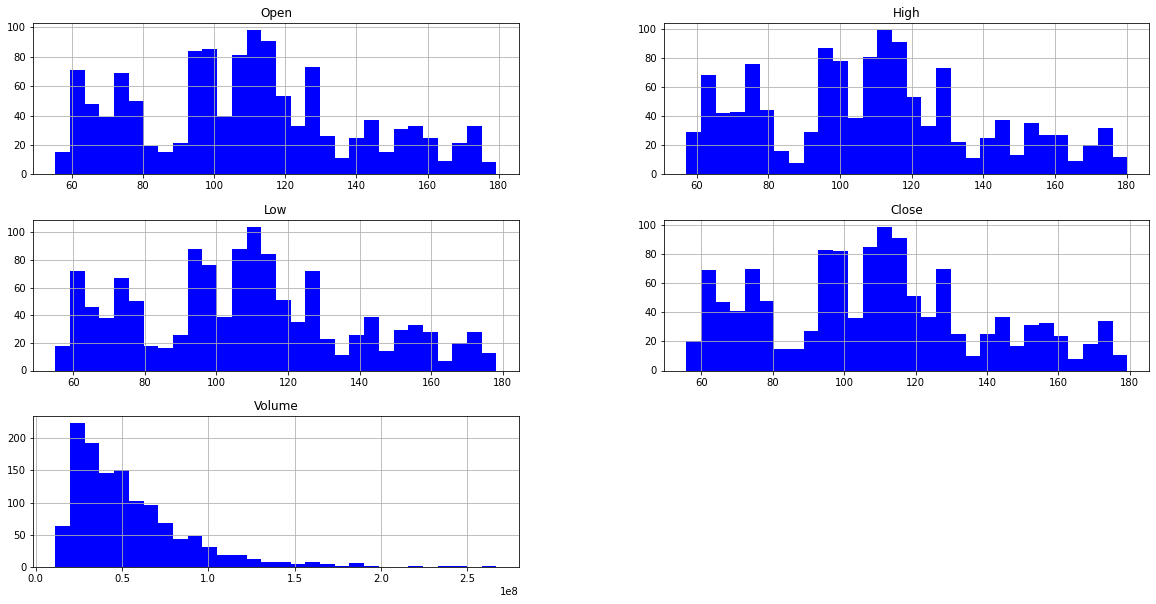

In [ ]:
aapl_stocks_df.hist(bins=30, figsize = (20,10), color = 'b')

b) visualizing in terms of correlation plot

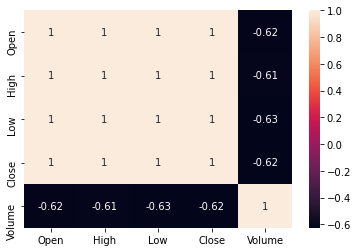

In [ ]:
corr_matrix = aapl_stocks_df.corr()
sns.heatmap(corr_matrix, annot = True)
plt.show()

c) visualizing in terms of time-series plot

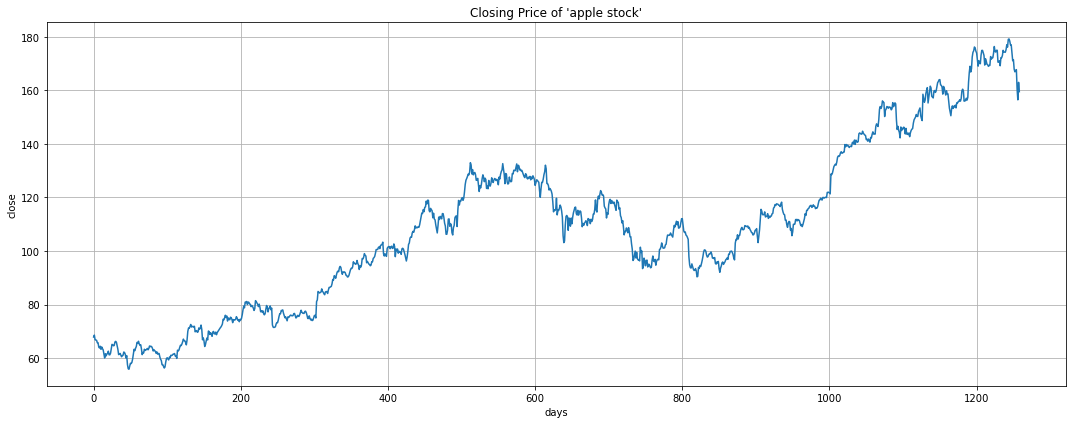

In [ ]:
plt.figure(figsize=(15, 6))
aapl_stocks_df['Close'].plot()
plt.ylabel('close')
plt.xlabel('days')
plt.title("Closing Price of 'apple stock'")
plt.tight_layout()
plt.grid()
plt.show()

<h3>Comments:</h3>
<li> based on the dataset description above, the data feature are all in numerical/scalar </li>
<li> since in this work only focused on univariate feature input and predict closing prediction, only closing price feature will be extracted from the dataset above </li>

<h2>2.4 Data pre-process</h2>

a) Dropping the unneeded columns

In [ ]:
# Read col1 into a numpy array
data = aapl_stocks_df.filter(['Close'])

# Convert the dataframe to a numpy array
dataset = data.values

b) Perform data normalization

In [ ]:
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))
training_data_len

# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0, 1))
scaled_data = scaler.fit_transform(dataset)
print(scaled_data)

[[0.0977103 ]
 [0.103438  ]
 [0.08951884]
 ...
 [0.81558288]
 [0.86855117]
 [0.84028522]]


c) Data split - split the dataset into train and test sets

In [ ]:
# Creating a data structure with 60 timestamps and 1 output
# Slicing the dataset

# Create the training data set
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(30, len(train_data)):
    x_train.append(train_data[i-30:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 31:
        print(x_train)
        print(y_train)

# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
X_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
#_train.shape

[array([0.0977103 , 0.103438  , 0.08951884, 0.08848863, 0.08800268,
       0.08056363, 0.08036683, 0.06747788, 0.06424956, 0.06974563,
       0.0604778 , 0.06761637, 0.06252526, 0.05885797, 0.046212  ,
       0.03415564, 0.04699113, 0.04064871, 0.04634158, 0.04765769,
       0.05477358, 0.0438511 , 0.04375877, 0.04856074, 0.06147237,
       0.07542636, 0.07400334, 0.07121481, 0.07196641, 0.08258842])]
[0.08452005789255856]
[array([0.0977103 , 0.103438  , 0.08951884, 0.08848863, 0.08800268,
       0.08056363, 0.08036683, 0.06747788, 0.06424956, 0.06974563,
       0.0604778 , 0.06761637, 0.06252526, 0.05885797, 0.046212  ,
       0.03415564, 0.04699113, 0.04064871, 0.04634158, 0.04765769,
       0.05477358, 0.0438511 , 0.04375877, 0.04856074, 0.06147237,
       0.07542636, 0.07400334, 0.07121481, 0.07196641, 0.08258842]), array([0.103438  , 0.08951884, 0.08848863, 0.08800268, 0.08056363,
       0.08036683, 0.06747788, 0.06424956, 0.06974563, 0.0604778 ,
       0.06761637, 0.06252526, 0.0

In [ ]:
X_train[0].shape

(30, 1)

<h1><center>3.0 Model Implementation (Baseline Model)</center></h1>
<p>in this section, a baseline Long Short-Term Memory (LSTM) model will be designed and trained on two different variate feature (uni & multi) with a 30 days sampling - workflows (Fig. 4): </p>
<li> Workflow (1): Using the uni-variate sample dataset </li>
<li> Workflow (2): Using the multi-variate sample dataset </li>

![image-3.png](attachment:image-3.png)
<h4><center>Fig. 4: Baseline, CNN + Baseline model workflows</center></h4>

<h2>3.1 CNN + LSTM Design Description and Justification</h2>

The proposed baseline LSTM architecture design with justification is as following:
<h3>LSTM baseline</h3>
<li> A sequential LSTM model architecture will be used </li>
<li> the input layer takes in (-1, 30, 1) single-channel variable with sampling of 30 days which corresponds to closing price feature data.</li>
<li> the first LSTM layer uses 128 units/dimensionality with the boolean return_sequence to be true - to return the last output sequence to the next.</li>
<li> the next layer followed by another LSTM layer with lesser units of 64 and set the boolean return_sequence to false.</li>
<li> finaly the last 2 layers attach with dense-layer with the input sequence of 25 unit and lastly down to 1 unit.</li>
<li> Fig. 5 illustrates the block diagram of the CNN baseline model layersused in this work:</li>

![image-6.png](attachment:image-6.png)
<h4><center>Fig. 5: Baseline model architecture</center></h4>

<li> The model parameters are as follows (Table 6):</li>

Layer Name|Layer Type|Feature Map| Output shape|Filter Size|Activation
---------:|:--------:|:---------:|:----------:|:---------:|:---------:
IN        |Input     |univariate |            | - | -
lstm      |LSTM      |128        |(None, 30, 128)| - | -
lstm_1    |LSTM      |64         |(None, 64)  | - | -
dense     |Dense     |25         |(None, 25)  | - | -
dense     |Dense     |1          |(None, 1)   | - | -

<h4><center>Table 6: Baseline model parameters</center></h4>


<li> The training parameters are as follows (Table 6):</li>

Training Parameter|Parameter
--------------:|:--------:
Batch Size     |1     
Epoch          |10     
Optimizer      |Adam    
Loss function  |Mean Squared Error     

<h4><center>Table 8: Baseline Training parameters</center></h4>



<h3>CNN + LSTM baseline</h3>
<li> A sequential LSTM model architecture will be used </li>
<li> in this model a feature extraction from CNN architecture will be used, in this case instead of 2D convolutional operation, convolutional 1D will be used.</li>
<li> convolutional 1D set to 128 filters with filter size of 3, relu activation function and feds in input shape of (-1, 30, 1)</li>
<li> second layer of convolutional 1D set to 64 filters with filter size of 3 and activation function of relu</li>
<li> after convolutional layer operation follows up by max pooling operations with a pool size of 2 x 2</li>

<li> the first LSTM layer uses 64 units/dimensionality with the boolean return_sequence to be true - to return the last output sequence to the next.</li>
<li> the next layer followed by another LSTM layer with lesser units of 32 and set the boolean return_sequence to false.</li>
<li> finaly the last 2 layers attach with dense-layer with the input sequence of 25 unit and lastly down to 1 unit.</li>

![image-7.png](attachment:image-7.png)

<h4><center>Fig. 6: Proposed baseline model architecture</center></h4>

<li> The model parameters are as follows (Table 6):</li>

Layer Name   |Layer Type    |Feature Map| Output shape   |Filter Size|Activation
------------:|:------------:|:---------:|:--------------:|:---------:|:---------:
IN           |Input         |univariate |                | -         | -
Conv1D       |Conv1D        |128        |(None, 28, 128) | 3         | Relu
Conv1D       |Conv1D        |64         |(None, 26, 64   | 3         | Relu
Max_Pooling1D|Max_Pooling1D |64         |(None, 13, 64)  | 2         | -
dense        |Dense         |100        |(None, 13, 100) | -         | Relu
dense        |Dense         |50         |(None, 13, 50)  | -         | Relu
lstm         |LSTM          |128        |(None, 13, 64)  | -         | -
lstm_1       |LSTM          |64         |(None, 13, 32)  | -         | -
Flatten      |Flatten       |1          |(None, 416)     | -         | -
dense        |Dense         |25         |(None, 100)     | -         | -
dense        |Dense         |1          |(None, 1)       | -         | -

<h4><center>Table 9: Baseline model parameters</center></h4>


<li> The training parameters are as follows (Table 6):</li>

Training Parameter|Parameter
--------------:|:--------:
Batch Size     |1     
Epoch          |10     
Optimizer      |Adam    
Loss function  |Mean Squared Error     

<h4><center>Table 10: Baseline Training parameters</center></h4>

---
<h3> 3.2 Model initialization</h3>

The initialization of the model is arranged according to the list below:

a) LSTM baseline model

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, LSTM
keras.backend.clear_session()

# Build the LSTM model
baseline_lstm_model = Sequential()
baseline_lstm_model.add(LSTM(128, return_sequences=True, input_shape= (X_train.shape[1], 1)))
baseline_lstm_model.add(LSTM(64, return_sequences=False))
baseline_lstm_model.add(Dense(25))
baseline_lstm_model.add(Dense(1))

In [ ]:
# Compile the model
baseline_lstm_model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse', 'mae'])

In [ ]:
baseline_lstm_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 30, 128)           66560     
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dense (Dense)                (None, 25)                1625      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 26        
Total params: 117,619
Trainable params: 117,619
Non-trainable params: 0
_________________________________________________________________


In [ ]:
import datetime
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

# Train the model
history = baseline_lstm_model.fit(X_train, y_train, batch_size=1, epochs=10,callbacks=[tensorboard_callback])

Epoch 1/10
1167/1167 [==============================] - 15s 13ms/step - loss: 2.6083e-04 - mse: 2.6083e-04 - mae: 0.0122
Epoch 2/10
1167/1167 [==============================] - 14s 12ms/step - loss: 2.7646e-04 - mse: 2.7646e-04 - mae: 0.0124
Epoch 3/10
1167/1167 [==============================] - 14s 12ms/step - loss: 2.7096e-04 - mse: 2.7096e-04 - mae: 0.0124
Epoch 4/10
1167/1167 [==============================] - 14s 12ms/step - loss: 2.7239e-04 - mse: 2.7239e-04 - mae: 0.0124
Epoch 5/10
1167/1167 [==============================] - 14s 12ms/step - loss: 2.5765e-04 - mse: 2.5765e-04 - mae: 0.0122
Epoch 6/10
1167/1167 [==============================] - 14s 12ms/step - loss: 2.8409e-04 - mse: 2.8409e-04 - mae: 0.0126
Epoch 7/10
1167/1167 [==============================] - 14s 12ms/step - loss: 2.5541e-04 - mse: 2.5541e-04 - mae: 0.0119
Epoch 8/10
1167/1167 [==============================] - 14s 12ms/step - loss: 2.6400e-04 - mse: 2.6400e-04 - mae: 0.0121 1s - loss: 2.7359e-04 - m
Epoch 

In [ ]:
%load_ext tensorboard
%tensorboard --logdir logs/fit

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 7308), started 0:24:11 ago. (Use '!kill 7308' to kill it.)

In [ ]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002
test_data = scaled_data[training_data_len - 30: , :]

# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(30, len(test_data)):
    x_test.append(test_data[i-30:i, 0])

# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values
baseline_lstm_predictions = baseline_lstm_model.predict(x_test)
baseline_lstm_predictions = scaler.inverse_transform(X=baseline_lstm_predictions)

# Get the root mean squared error (RMSE)
baseline_lstm_rmse = np.sqrt(np.mean(((baseline_lstm_predictions - y_test) ** 2)))
baseline_lstm_rmse

2.198051968989484

<ipython-input-20-14eaf4dd0871>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = baseline_lstm_predictions


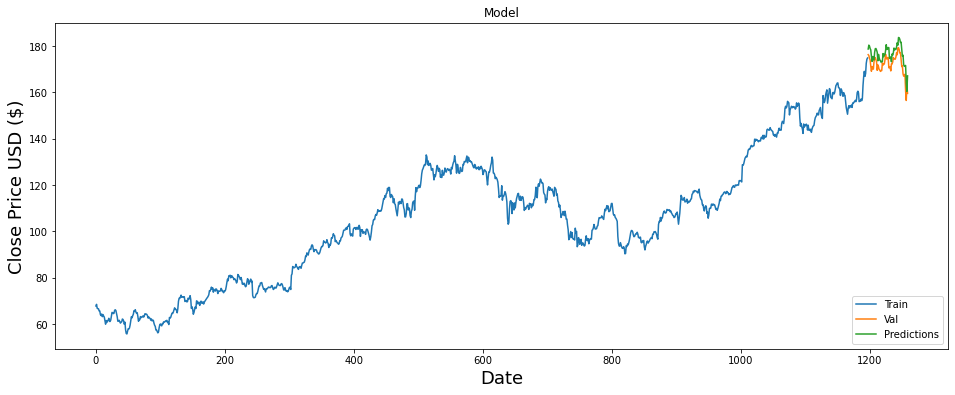

In [ ]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = baseline_lstm_predictions

# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

b) Convolutional Neural Network (CNN) + Baseline model - 1

In [ ]:
cnn_lstm_model1 = keras.models.Sequential()
cnn_lstm_model1.add(keras.layers.Conv1D(filters=128, kernel_size=3, activation='relu',  input_shape= (X_train.shape[1], 1)))
cnn_lstm_model1.add(keras.layers.Conv1D(filters=64, kernel_size=3, activation='relu'))
cnn_lstm_model1.add(keras.layers.MaxPooling1D(pool_size=2))
cnn_lstm_model1.add(keras.layers.Dense(100, activation='relu'))
cnn_lstm_model1.add(keras.layers.Dense(50, activation='relu'))
cnn_lstm_model1.add(keras.layers.LSTM(64, activation=None, return_sequences = True))
cnn_lstm_model1.add(keras.layers.LSTM(32, activation=None, return_sequences = True))
cnn_lstm_model1.add(keras.layers.Flatten())
cnn_lstm_model1.add(keras.layers.Dense(100, activation=None))
cnn_lstm_model1.add(keras.layers.Dense(1))

In [ ]:
# Compile the model
cnn_lstm_model1.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
cnn_lstm_model1.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_6 (Conv1D)            (None, 28, 128)           512       
_________________________________________________________________
conv1d_7 (Conv1D)            (None, 26, 64)            24640     
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 13, 64)            0         
_________________________________________________________________
dense_9 (Dense)              (None, 13, 100)           6500      
_________________________________________________________________
dense_10 (Dense)             (None, 13, 50)            5050      
_________________________________________________________________
lstm_6 (LSTM)                (None, 13, 64)            29440     
_________________________________________________________________
lstm_7 (LSTM)                (None, 13, 32)           

In [ ]:
# Train the model
cnn_lstm_model1.fit(X_train, y_train, batch_size=1, epochs=10)

In [ ]:
# Get the models predicted price values
cnn_lstm_predictions = cnn_lstm_model1.predict(x_test)
cnn_lstm_predictions = scaler.inverse_transform(X=cnn_lstm_predictions)

# Get the root mean squared error (RMSE)
cnn_lstm_rmse = np.sqrt(np.mean(((cnn_lstm_predictions - y_test) ** 2)))
cnn_lstm_rmse

3.7066976891534913

<ipython-input-44-715aa10e903d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = cnn_lstm_predictions


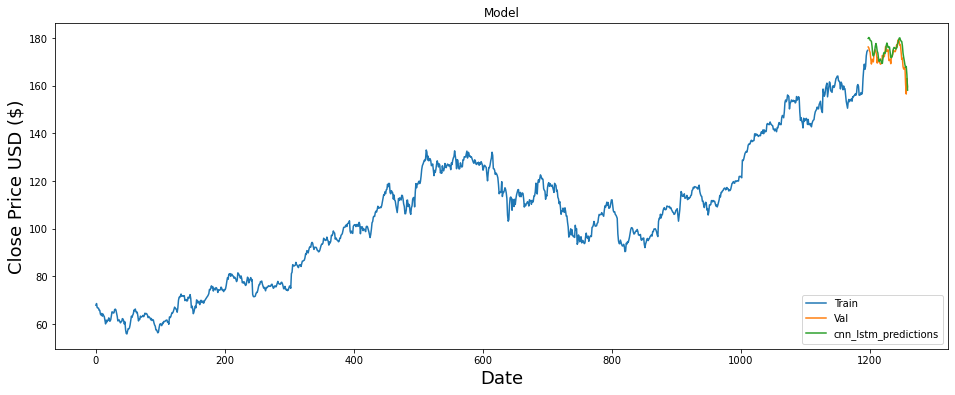

In [ ]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = cnn_lstm_predictions

# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'cnn_lstm_predictions'], loc='lower right')
plt.show()

---
<h1><center>4.0 Model Customization and Hyper-Parameters Tuning </center></h1>
<p>
    <justify>
in this section, a Convolutional Neural Network (CNN)
   </justify>
</p>

In [ ]:
# Build the LSTM model
keras.backend.clear_session()
cnn_lstm_model2 = Sequential()
cnn_lstm_model2.add(keras.layers.Conv1D(filters=128, kernel_size=3, activation='relu',  input_shape= (x_train.shape[1], 1)))
cnn_lstm_model2.add(keras.layers.Conv1D(filters=64, kernel_size=3, activation='relu'))
cnn_lstm_model2.add(keras.layers.MaxPooling1D(pool_size=2))
cnn_lstm_model2.add(keras.layers.Dense(100, activation='relu'))
cnn_lstm_model2.add(keras.layers.Dense(50, activation='relu'))
cnn_lstm_model2.add(LSTM(128, return_sequences=True))
cnn_lstm_model2.add(LSTM(64, return_sequences=False))
cnn_lstm_model2.add(keras.layers.Flatten())
cnn_lstm_model2.add(Dense(25))
cnn_lstm_model2.add(Dense(1))

In [ ]:
# Compile the model
cnn_lstm_model2.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
cnn_lstm_model2.summary()

In [ ]:
# Train the model
cnn_lstm_model2.fit(X_train, y_train, batch_size=1, epochs=10)

In [ ]:
# Get the models predicted price values
cnn_lstm_model2_predictions = cnn_lstm_model2.predict(x_test)
cnn_lstm_model2_predictions = scaler.inverse_transform(cnn_lstm_model2_predictions)

# Get the root mean squared error (RMSE)
cnn_lstm_model2_rmse = np.sqrt(np.mean(((cnn_lstm_model2_predictions - y_test) ** 2)))
cnn_lstm_model2_rmse

3.0500561016370593

<ipython-input-33-eee14e3b8a73>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = cnn_lstm_model2_predictions


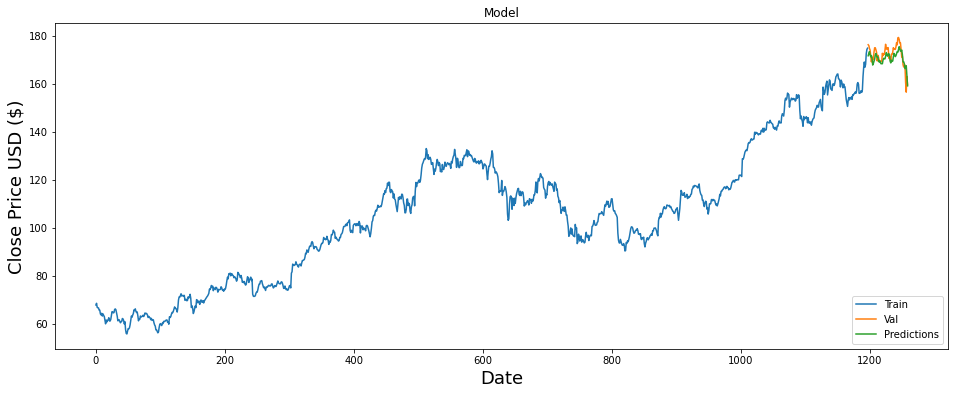

In [ ]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = cnn_lstm_model2_predictions

# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

# CNN-Bi-LSTM

In [ ]:
import tensorflow as tf
from tensorflow import keras
cnn_Bi_lstm_model = keras.models.Sequential()
cnn_Bi_lstm_model.add(keras.layers.Conv1D(filters=128, kernel_size=3, activation='relu',  input_shape= (X_train.shape[1], 1)))
cnn_Bi_lstm_model.add(keras.layers.Conv1D(filters=64, kernel_size=3, activation='relu'))
cnn_Bi_lstm_model.add(keras.layers.MaxPooling1D(pool_size=2))
cnn_Bi_lstm_model.add(Bidirectional(LSTM(200,return_sequences=True)))
cnn_Bi_lstm_model.add(Dropout(0.25))
cnn_Bi_lstm_model.add(Bidirectional(LSTM(200,return_sequences=False)))
cnn_Bi_lstm_model.add(Dropout(0.5))
cnn_Bi_lstm_model.add(Dense(1, activation='linear'))
cnn_Bi_lstm_model.compile(optimizer='adam', loss='mean_squared_error')
cnn_Bi_lstm_model.fit(X_train, y_train, batch_size=1, epochs=10)

Epoch 1/10
1167/1167 [==============================] - 57s 46ms/step - loss: 0.0095
Epoch 2/10
1167/1167 [==============================] - 50s 43ms/step - loss: 0.0050
Epoch 3/10
1167/1167 [==============================] - 51s 43ms/step - loss: 0.0039
Epoch 4/10
1167/1167 [==============================] - 50s 43ms/step - loss: 0.0029
Epoch 5/10
1167/1167 [==============================] - 51s 44ms/step - loss: 0.0026
Epoch 6/10
1167/1167 [==============================] - 52s 44ms/step - loss: 0.0021
Epoch 7/10
1167/1167 [==============================] - 52s 44ms/step - loss: 0.0022
Epoch 8/10
1167/1167 [==============================] - 52s 44ms/step - loss: 0.0017
Epoch 9/10
1167/1167 [==============================] - 52s 44ms/step - loss: 0.0020
Epoch 10/10
1167/1167 [==============================] - 52s 45ms/step - loss: 0.0018


In [ ]:
# Get the models predicted price values
cnn_Bi_lstm_model_predictions = cnn_Bi_lstm_model.predict(x_test)
cnn_Bi_lstm_model_predictions = scaler.inverse_transform(cnn_Bi_lstm_model_predictions)

# Get the root mean squared error (RMSE)
cnn_Bi_lstm_model_rmse = np.sqrt(np.mean(((cnn_Bi_lstm_model_predictions - y_test) ** 2)))
cnn_Bi_lstm_model_rmse

3.4585861692360433

<ipython-input-37-e6507311fa02>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = cnn_Bi_lstm_model_predictions


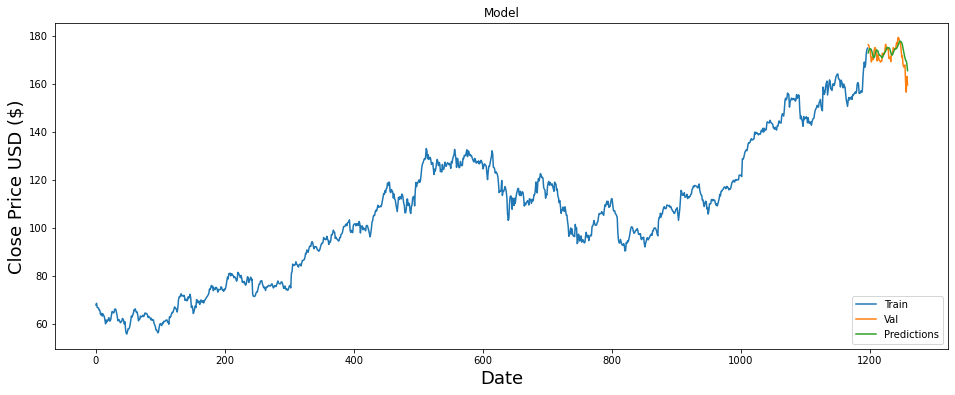

In [ ]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = cnn_Bi_lstm_model_predictions

# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

---
<h1><center>5.0 Model Evaluations </center></h1>
<p>
    <justify>
tensorboard visualization comparison model performance
   </justify>
</p>

---
<h1><center>6.0 Comparison Model Performances </center></h1>
<p>
    <justify>
tensorboard visualization comparison model performance
   </justify>
</p>

---
<h1><center>7.0 Future works </center></h1>
<p>
    <justify>
Future works suggestions
   </justify>
</p>


---
<h1><center>References </center></h1>
<p>
    <justify>
Gan, L., Wang, H. and Yang, Z., 2020. Machine learning solutions to challenges in finance: An application to the pricing of financial products. Technological Forecasting and Social Change, 153, p.119928.
        
Lawal, Z., Yassin, H. and Zakari, R., 2020. Stock Market Prediction using Supervised Machine Learning Techniques: An Overview. 2020 IEEE Asia-Pacific Conference on Computer Science and Data Engineering (CSDE),.
        
Li, Z. and Jiang, W., 2020. Evaluation of Machine Learning Techniques for Stock Market Movement Prediction. 2020 Management Science Informatization and Economic Innovation Development Conference (MSIEID).
   </justify>
</p>